 # Análise Eleitoral Estado do Rio de Janeiro
 
  ### Objetivos: Entender a distibuicao racial, etária e de genero dos candidatos ao cargo de verador por partido e território
  ### Dados: http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais
  
  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import numpy as np


py.init_notebook_mode(connected=True)

%matplotlib inline

In [2]:
# Definindo casas decimais
decimais = 1

In [3]:
consulta = pd.read_csv('consulta_cand_2016_RJ.csv', sep=';', encoding='latin-1', low_memory=False)

In [4]:
consulta2016 = pd.DataFrame(consulta, columns= ['DS_CARGO','NM_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NM_PARTIDO','DS_GENERO',
                                                'DS_COR_RACA', 'NR_IDADE_DATA_POSSE', 'DS_GRAU_INSTRUCAO','NM_UE', 'VR_DESPESA_MAX_CAMPANHA'])

In [5]:
consulta_Vereador_2016 = consulta2016.loc[consulta['DS_CARGO'] == 'VEREADOR']

In [6]:
# Renomeando a coluna raça para os declarados pretos e pardos
for (row, col) in consulta_Vereador_2016.iterrows():
    if col.DS_COR_RACA == 'PRETA':
        consulta_Vereador_2016['DS_COR_RACA'].replace(to_replace=col.DS_COR_RACA, value='NEGRA', inplace=True)
    if col.DS_COR_RACA == 'PARDA':
        consulta_Vereador_2016['DS_COR_RACA'].replace(to_replace=col.DS_COR_RACA, value='NEGRA', inplace=True)

In [7]:
consulta_Vereador_2016.to_csv('consulta_Vereador_2016_RJ.csv')

### Visão Geral

Há 21227 candidaturas ao cargo de vereador,35 partidos e 92 unidades eleitorais.

O partido com maior número de candidaturas no Rio de Janeiro é o PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO, já o PARTIDO COMUNISTA BRASILEIRO tem o menor número de candidaturas. 

RIO DE JANEIRO  é a unidade eleitoral com maior número de candidaturas,1628, ao contrário de SÃO SEBASTIÃO DO ALTO que possui apenas 48 candidaturas.

 68% das candidaturas são de homens, 45% são de declarados negros,  média de idade é de 46 anos e maioria dos candidatos tem  o ensino médio completo
 
 
 
 
 
 
 
 
 
 
 ***OBS:*** *A análise de raça foi feita a partir do que é entendido como população negra no Brasil por parte das instituições Data Labe e Alma Preta, assim foi considerados negros a soma de pretos e pardos*


In [8]:
consulta_Vereador_2016.nunique()

DS_CARGO                       1
NM_CANDIDATO               21227
NM_SOCIAL_CANDIDATO            1
NM_PARTIDO                    35
DS_GENERO                      2
DS_COR_RACA                    4
NR_IDADE_DATA_POSSE           72
DS_GRAU_INSTRUCAO              7
NM_UE                         92
VR_DESPESA_MAX_CAMPANHA        2
dtype: int64

In [9]:
consulta_Vereador_2016['NM_PARTIDO'].value_counts()

PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO       1205
PARTIDO PROGRESSISTA                              1129
PARTIDO REPUBLICANO BRASILEIRO                    1035
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA           1030
PARTIDO DEMOCRÁTICO TRABALHISTA                   1001
PARTIDO SOCIALISTA BRASILEIRO                      943
PARTIDO TRABALHISTA BRASILEIRO                     901
PARTIDO POPULAR SOCIALISTA                         862
PARTIDO DA REPÚBLICA                               827
DEMOCRATAS                                         813
PARTIDO SOCIAL CRISTÃO                             809
SOLIDARIEDADE                                      788
PARTIDO HUMANISTA DA SOLIDARIEDADE                 739
PARTIDO TRABALHISTA DO BRASIL                      693
PARTIDO VERDE                                      674
PARTIDO SOCIAL DEMOCRATA CRISTÃO                   673
PARTIDO TRABALHISTA NACIONAL                       638
PARTIDO REPUBLICANO PROGRESSISTA                   609
PARTIDO RE

<AxesSubplot:title={'center':'DISTRIBUIÇÃO DE CANDIDATURAS POR PARTIDO'}>

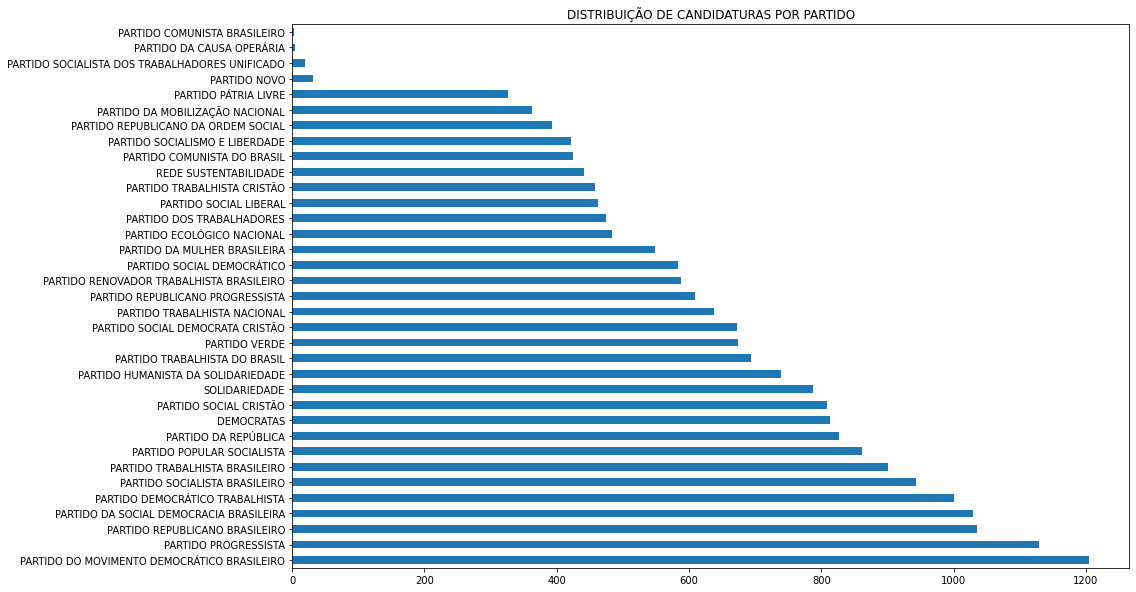

In [12]:
consulta_Vereador_2016['NM_PARTIDO'].value_counts().plot(kind='barh', title='DISTRIBUIÇÃO DE CANDIDATURAS POR PARTIDO', figsize=(15,10))

In [10]:
consulta_Vereador_2016['NM_UE'].value_counts()

RIO DE JANEIRO           1628
DUQUE DE CAXIAS           833
SÃO GONÇALO               729
BELFORD ROXO              661
CAMPOS DOS GOYTACAZES     597
                         ... 
SUMIDOURO                  56
VARRE-SAI                  55
APERIBÉ                    54
DUAS BARRAS                50
SÃO SEBASTIÃO DO ALTO      48
Name: NM_UE, Length: 92, dtype: int64

In [15]:
consulta_Vereador_2016['NR_IDADE_DATA_POSSE'].describe()

count    21395.000000
mean        46.330311
std         11.300870
min         18.000000
25%         38.000000
50%         46.000000
75%         54.000000
max         93.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [31]:
#Distribuição de Gênero
consulta_Vereador_2016['DS_GENERO'].value_counts()*100/21227

MASCULINO    68.134923
FEMININO     32.656522
Name: DS_GENERO, dtype: float64

In [16]:
consulta_Vereador_2016['DS_COR_RACA'].value_counts()*100/21227

BRANCA      55.175013
NEGRA       45.234842
AMARELA      0.259104
INDÍGENA     0.122486
Name: DS_COR_RACA, dtype: float64

In [17]:
consulta_Vereador_2016['DS_GRAU_INSTRUCAO'].value_counts()*100/21227

ENSINO MÉDIO COMPLETO            42.271635
SUPERIOR COMPLETO                20.563433
ENSINO FUNDAMENTAL COMPLETO      12.959910
ENSINO FUNDAMENTAL INCOMPLETO    12.842135
ENSINO MÉDIO INCOMPLETO           5.973524
SUPERIOR INCOMPLETO               5.370519
LÊ E ESCREVE                      0.810289
Name: DS_GRAU_INSTRUCAO, dtype: float64

### Relação de Raca e Gênero com os partidos e unidade eleitorais: Como é a representatividade no Rio de Janeiro?

O Partido com maior número de candidatas de ambos os sexos é o PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA e assim como o partido com menor candidatura, PARTIDO COMUNISTA BRASILEIRO.

Rio de Janeiro é a unidade eleitoral com maior número de candidatos de ambos os sexo ao cargo de vereador, já SÃO SEBASTIÃO DO ALTO é unidade eleitoral com o menor número de candidatos de ambos os sexos. Rio de Janeiro tem a maioria dos candidatos de ambos os sexos declarados brancos e negros. negros.

Quanto a candidatas, 44% são negras e em média tem 46 anos. Já homens são a maioria branca, 54%, com mesma média de idade das candidatas. Em ambos os sexos mais de 40% dos candidatos tem ensino médio completo e em torno de 1% que apenas lê  escreve.


*feminino*

In [18]:
# Criando um novo Dataframe só com mulheres
fem = pd.DataFrame(consulta_Vereador_2016.loc[consulta_Vereador_2016['DS_GENERO'] == 'FEMININO'])

In [19]:
# Distribuição dos Partidos
fem['NM_PARTIDO'].value_counts()

PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO       392
PARTIDO PROGRESSISTA                              374
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA           352
PARTIDO REPUBLICANO BRASILEIRO                    328
PARTIDO DEMOCRÁTICO TRABALHISTA                   319
PARTIDO SOCIALISTA BRASILEIRO                     309
PARTIDO TRABALHISTA BRASILEIRO                    293
PARTIDO DA REPÚBLICA                              278
PARTIDO POPULAR SOCIALISTA                        277
DEMOCRATAS                                        259
SOLIDARIEDADE                                     256
PARTIDO SOCIAL CRISTÃO                            248
PARTIDO HUMANISTA DA SOLIDARIEDADE                233
PARTIDO DA MULHER BRASILEIRA                      220
PARTIDO TRABALHISTA DO BRASIL                     215
PARTIDO TRABALHISTA NACIONAL                      214
PARTIDO VERDE                                     213
PARTIDO SOCIAL DEMOCRATA CRISTÃO                  206
PARTIDO REPUBLICANO PROGRESS

<AxesSubplot:title={'center':'DISTRIBUIÇÃO DE PARTIDOS POR GÊNERO - FEMININO'}>

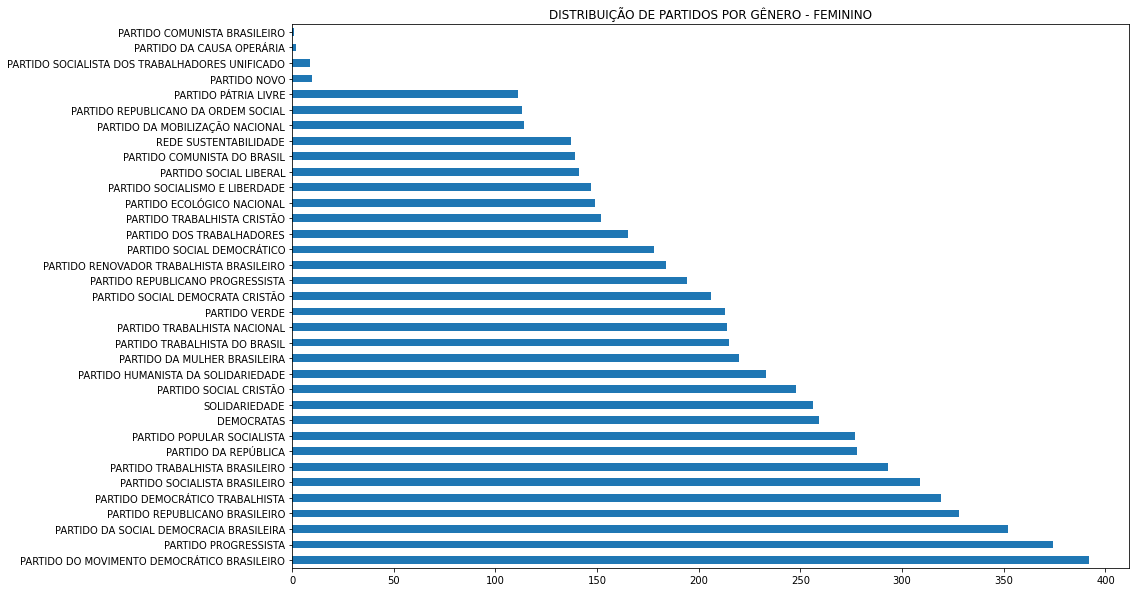

In [20]:
fem['NM_PARTIDO'].value_counts().plot(kind='barh', title= 'DISTRIBUIÇÃO DE PARTIDOS POR GÊNERO - FEMININO', figsize=(15,10))

In [21]:
# Distribuição por unidade eleitoral
fem['NM_UE'].value_counts()

RIO DE JANEIRO           512
DUQUE DE CAXIAS          262
SÃO GONÇALO              229
BELFORD ROXO             214
CAMPOS DOS GOYTACAZES    189
                        ... 
MACUCO                    20
APERIBÉ                   19
VARRE-SAI                 18
DUAS BARRAS               17
SÃO SEBASTIÃO DO ALTO     16
Name: NM_UE, Length: 92, dtype: int64

In [26]:
# Distribuição racial
fem['DS_COR_RACA'].value_counts()*100/6932

BRANCA      55.640508
NEGRA       43.941143
AMARELA      0.230814
INDÍGENA     0.187536
Name: DS_COR_RACA, dtype: float64

In [23]:
fem['NR_IDADE_DATA_POSSE'].describe()

count    6932.000000
mean       45.905222
std        11.717966
min        18.000000
25%        38.000000
50%        46.000000
75%        54.000000
max        86.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [27]:
fem['DS_GRAU_INSTRUCAO'].value_counts()*100/6932

ENSINO MÉDIO COMPLETO            41.733987
SUPERIOR COMPLETO                22.417773
ENSINO FUNDAMENTAL COMPLETO      11.915753
ENSINO FUNDAMENTAL INCOMPLETO    11.021350
SUPERIOR INCOMPLETO               6.030006
ENSINO MÉDIO INCOMPLETO           5.828044
LÊ E ESCREVE                      1.053087
Name: DS_GRAU_INSTRUCAO, dtype: float64

In [28]:
fem.filter(items=['DS_GRAU_INSTRUCAO']).groupby(fem['DS_COR_RACA']).describe()

DS_GRAU_INSTRUCAO                                    
                        count unique                    top  freq
DS_COR_RACA                                                      
AMARELA                    16      3  ENSINO MÉDIO COMPLETO    10
BRANCA                   3857      7  ENSINO MÉDIO COMPLETO  1621
INDÍGENA                   13      6  ENSINO MÉDIO COMPLETO     4
NEGRA                    3046      7  ENSINO MÉDIO COMPLETO  1258

In [29]:
fem.filter(items=['NM_UE']).groupby(fem['DS_COR_RACA']).describe()

NM_UE                            
            count unique             top freq
DS_COR_RACA                                  
AMARELA        16     10     SÃO GONÇALO    3
BRANCA       3857     92  RIO DE JANEIRO  254
INDÍGENA       13      8  RIO DE JANEIRO    3
NEGRA        3046     92  RIO DE JANEIRO  255

*Masculino*

In [30]:
#Criando DataFrame
masc = pd.DataFrame(consulta_Vereador_2016.loc[consulta_Vereador_2016['DS_GENERO'] == 'MASCULINO'])

In [32]:
# Distribuição dos Partidos
masc['NM_PARTIDO'].value_counts()

PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO       813
PARTIDO PROGRESSISTA                              755
PARTIDO REPUBLICANO BRASILEIRO                    707
PARTIDO DEMOCRÁTICO TRABALHISTA                   682
PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA           678
PARTIDO SOCIALISTA BRASILEIRO                     634
PARTIDO TRABALHISTA BRASILEIRO                    608
PARTIDO POPULAR SOCIALISTA                        585
PARTIDO SOCIAL CRISTÃO                            561
DEMOCRATAS                                        554
PARTIDO DA REPÚBLICA                              549
SOLIDARIEDADE                                     532
PARTIDO HUMANISTA DA SOLIDARIEDADE                506
PARTIDO TRABALHISTA DO BRASIL                     478
PARTIDO SOCIAL DEMOCRATA CRISTÃO                  467
PARTIDO VERDE                                     461
PARTIDO TRABALHISTA NACIONAL                      424
PARTIDO REPUBLICANO PROGRESSISTA                  415
PARTIDO SOCIAL DEMOCRÁTICO  

In [33]:
# Distribuição por unidade eleitoral
masc['NM_UE'].value_counts()

RIO DE JANEIRO           1116
DUQUE DE CAXIAS           571
SÃO GONÇALO               500
BELFORD ROXO              447
CAMPOS DOS GOYTACAZES     408
                         ... 
VARRE-SAI                  37
SUMIDOURO                  35
APERIBÉ                    35
DUAS BARRAS                33
SÃO SEBASTIÃO DO ALTO      32
Name: NM_UE, Length: 92, dtype: int64

In [35]:
masc['DS_COR_RACA'].value_counts()*100/14463

BRANCA      54.311000
NEGRA       45.329461
AMARELA      0.269654
INDÍGENA     0.089885
Name: DS_COR_RACA, dtype: float64

In [37]:
masc['NR_IDADE_DATA_POSSE'].describe()

count    14463.000000
mean        46.534052
std         11.090041
min         18.000000
25%         38.000000
50%         46.000000
75%         54.000000
max         93.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [36]:
masc['DS_GRAU_INSTRUCAO'].value_counts()*100/14463

ENSINO MÉDIO COMPLETO            42.038305
SUPERIOR COMPLETO                19.435802
ENSINO FUNDAMENTAL INCOMPLETO    13.565650
ENSINO FUNDAMENTAL COMPLETO      13.309825
ENSINO MÉDIO INCOMPLETO           5.973864
SUPERIOR INCOMPLETO               4.992049
LÊ E ESCREVE                      0.684505
Name: DS_GRAU_INSTRUCAO, dtype: float64

In [38]:
masc.filter(items=['DS_GRAU_INSTRUCAO']).groupby(masc['DS_COR_RACA']).describe()

DS_GRAU_INSTRUCAO                                          
                        count unique                          top  freq
DS_COR_RACA                                                            
AMARELA                    39      6        ENSINO MÉDIO COMPLETO    17
BRANCA                   7855      7        ENSINO MÉDIO COMPLETO  3169
INDÍGENA                   13      6  ENSINO FUNDAMENTAL COMPLETO     3
NEGRA                    6556      7        ENSINO MÉDIO COMPLETO  2891

In [39]:
masc.filter(items=['NM_UE']).groupby(masc['DS_COR_RACA']).describe()

NM_UE                            
            count unique             top freq
DS_COR_RACA                                  
AMARELA        39     15       QUEIMADOS    8
BRANCA       7855     92  RIO DE JANEIRO  602
INDÍGENA       13     12     BARRA MANSA    2
NEGRA        6556     91  RIO DE JANEIRO  513

 #### RAÇA


In [40]:
# distribuição racial
consulta_Vereador_2016['DS_COR_RACA'].value_counts()*100/21227

BRANCA      55.175013
NEGRA       45.234842
AMARELA      0.259104
INDÍGENA     0.122486
Name: DS_COR_RACA, dtype: float64

In [41]:
# Criando novas colunas boleanas para raça
consulta_Vereador_2016['NEGRA'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('NEGRA')
consulta_Vereador_2016['BRANCA'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('BRANCA')
consulta_Vereador_2016['AMARELA'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('AMARELA')
consulta_Vereador_2016['INDÍGENA'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('INDÍGENA')
consulta_Vereador_2016['NÃO DIVULGÁVEL'] = consulta_Vereador_2016['DS_COR_RACA'].str.contains('NÃO DIVULGÁVEL')


In [42]:
# Criando dataframes por raça 
raca_cor = consulta_Vereador_2016['DS_COR_RACA'].unique().tolist()
dfs = {}

for raca in raca_cor:
    selected_rows = consulta_Vereador_2016[consulta_Vereador_2016[raca] == True]
    dfs[f'df_{raca}'] = selected_rows
    print

In [43]:
df_NEGRA = pd.DataFrame(dfs['df_NEGRA'])
df_BRANCA = pd.DataFrame(dfs['df_BRANCA'])
df_AMARELA = pd.DataFrame(dfs['df_AMARELA'])
df_INDIGENA = pd.DataFrame(dfs['df_INDÍGENA'])

*Negros*

In [44]:
df_NEGRA['NM_UE'].describe()

count               9602
unique                92
top       RIO DE JANEIRO
freq                 768
Name: NM_UE, dtype: object

In [45]:
df_NEGRA['NM_UE'].min()

'ANGRA DOS REIS'

In [46]:
df_NEGRA['NM_PARTIDO'].describe()

count                               9602
unique                                35
top       PARTIDO REPUBLICANO BRASILEIRO
freq                                 529
Name: NM_PARTIDO, dtype: object

In [47]:
df_NEGRA['NM_PARTIDO'].min()

'DEMOCRATAS'

*Branco*

In [48]:
df_BRANCA['NM_UE'].describe()

count              11712
unique                92
top       RIO DE JANEIRO
freq                 856
Name: NM_UE, dtype: object

In [49]:
df_BRANCA['NM_UE'].min()

'ANGRA DOS REIS'

In [50]:
df_BRANCA['NM_PARTIDO'].describe()

count                                           11712
unique                                             35
top       PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO
freq                                              772
Name: NM_PARTIDO, dtype: object

In [51]:
df_BRANCA['NM_PARTIDO'].min()

'DEMOCRATAS'

*Amarelos e Indigenas* 

In [52]:
df_AMARELA['NM_UE'].describe()

count            55
unique           18
top       QUEIMADOS
freq             10
Name: NM_UE, dtype: object

In [53]:
df_AMARELA['NM_PARTIDO'].describe()

count                               55
unique                              19
top       PARTIDO DA MULHER BRASILEIRA
freq                                 9
Name: NM_PARTIDO, dtype: object

In [54]:
df_INDIGENA['NM_UE'].describe()

count                 26
unique                15
top       RIO DE JANEIRO
freq                   4
Name: NM_UE, dtype: object

In [55]:
df_INDIGENA['NM_PARTIDO'].describe()

count                                   26
unique                                  14
top       PARTIDO SOCIAL DEMOCRATA CRISTÃO
freq                                     4
Name: NM_PARTIDO, dtype: object

 - GRAU DE INSTRUÇÃO

In [56]:
consulta_Vereador_2016.filter(items=['NM_UE']).groupby(consulta_Vereador_2016['DS_GRAU_INSTRUCAO']).describe()

NM_UE                            
                              count unique             top freq
DS_GRAU_INSTRUCAO                                              
ENSINO FUNDAMENTAL COMPLETO    2751     92  RIO DE JANEIRO  136
ENSINO FUNDAMENTAL INCOMPLETO  2726     92   NOVA FRIBURGO   99
ENSINO MÉDIO COMPLETO          8973     92  RIO DE JANEIRO  569
ENSINO MÉDIO INCOMPLETO        1268     91  RIO DE JANEIRO   54
LÊ E ESCREVE                    172     42    BELFORD ROXO   26
SUPERIOR COMPLETO              4365     92  RIO DE JANEIRO  624
SUPERIOR INCOMPLETO            1140     91  RIO DE JANEIRO  177

In [57]:
consulta_Vereador_2016.filter(items=['NM_PARTIDO']).groupby(consulta_Vereador_2016['DS_GRAU_INSTRUCAO']).describe()

NM_PARTIDO         \
                                   count unique   
DS_GRAU_INSTRUCAO                                 
ENSINO FUNDAMENTAL COMPLETO         2751     32   
ENSINO FUNDAMENTAL INCOMPLETO       2726     32   
ENSINO MÉDIO COMPLETO               8973     34   
ENSINO MÉDIO INCOMPLETO             1268     31   
LÊ E ESCREVE                         172     29   
SUPERIOR COMPLETO                   4365     35   
SUPERIOR INCOMPLETO                 1140     33   

                                                                            \
                                                                       top   
DS_GRAU_INSTRUCAO                                                            
ENSINO FUNDAMENTAL COMPLETO    PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO   
ENSINO FUNDAMENTAL INCOMPLETO                         PARTIDO PROGRESSISTA   
ENSINO MÉDIO COMPLETO          PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO   
ENSINO MÉDIO INCOMPLETO                               PARTIDO PROGRESSISTA   
LÊ E ESCREVE                                  PARTIDO DA MULHER BRASILEIRA   
SUPERIOR COMPLETO              PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO   
SUPERIOR INCOMPLETO            PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO   

                                    
                              freq  
DS_GRAU_INSTRUCAO                   
ENSINO FUNDAMENTAL COMPLETO    155  
ENSINO FUNDAMENTAL INCOMPLETO  142  
ENSINO MÉDIO COMPLETO          474  
ENSINO MÉDIO INCOMPLETO         76  
LÊ E ESCREVE                    19  
SUPERIOR COMPLETO              290  
SUPERIOR INCOMPLETO             77

### Criando DataFrame
 


*Partido*

In [58]:
# Variaveis de Gênero 
fem_partido = fem['NM_PARTIDO'].value_counts()
masc_partido = masc['NM_PARTIDO'].value_counts()


In [59]:
total_gen_partido = fem_partido + masc_partido

In [60]:
percent_fem_partido = fem_partido * 100/total_gen_partido
percent_masc_partido = masc_partido * 100/total_gen_partido

In [61]:
percent_masc_partido = percent_masc_partido.apply(lambda x: round(x, decimais))
percent_fem_partido = percent_fem_partido.apply(lambda x: round(x, decimais))

In [62]:
# Variaveis de raça
negra = df_NEGRA['NM_PARTIDO'].value_counts()
branca = df_BRANCA['NM_PARTIDO'].value_counts()
amarela = df_AMARELA['NM_PARTIDO'].value_counts()
indigena = df_INDIGENA['NM_PARTIDO'].value_counts()

In [63]:
total_raca_partido = consulta_Vereador_2016['NM_PARTIDO'].value_counts()

In [64]:
percent_negra = negra *100/total_raca_partido
percent_branca = branca *100/total_raca_partido
percent_amarela = amarela *100/total_raca_partido
percent_indigena = indigena *100/total_raca_partido

In [65]:
percent_negra = percent_negra.apply(lambda x: round(x, decimais))
percent_branca = percent_branca.apply(lambda x: round(x, decimais))
percent_amarela = percent_amarela.apply(lambda x: round(x, decimais))
percent_indigena = percent_indigena.apply(lambda x: round(x, decimais))

In [66]:
# Variaveis de Grau de instrucao

ens_Med = consulta_Vereador_2016.loc[(consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO COMPLETO') + (consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'ENSINO MÉDIO INCOMPLETO')]
ens_Fund = consulta_Vereador_2016.loc[(consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'ENSINO FUNDAMENTAL COMPLETO') + (consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'ENSINO FUNDAMENTAL INCOMPLETO')]
ens_Sup = consulta_Vereador_2016.loc[(consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'SUPERIOR COMPLETO') + (consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'SUPERIOR INCOMPLETO')]
ens_Le = consulta_Vereador_2016.loc[consulta_Vereador_2016['DS_GRAU_INSTRUCAO'] == 'LÊ E ESCREVE']


In [67]:
fundamental = ens_Fund['NM_PARTIDO'].value_counts() 
medio = ens_Med['NM_PARTIDO'].value_counts() 
superior = ens_Sup['NM_PARTIDO'].value_counts() 
le_escreve = ens_Le['NM_PARTIDO'].value_counts()

In [68]:
total_ens_partido = consulta_Vereador_2016['NM_PARTIDO'].value_counts() 

In [69]:
percent_ens_Med = medio*100/total_ens_partido
percent_ens_Fund = fundamental*100/total_ens_partido
percent_ens_Sup = superior*100/total_ens_partido 
percent_ens_Le = le_escreve*100/total_ens_partido


In [70]:
percent_ens_Med= percent_ens_Med.apply(lambda x: round(x, decimais))
percent_ens_Fund= percent_ens_Fund.apply(lambda x: round(x, decimais))
percent_ens_Sup = percent_ens_Sup.apply(lambda x: round(x, decimais))
percent_ens_Le = percent_ens_Le.apply(lambda x: round(x, decimais))


In [71]:
# Criando Data Frame 

dic1 = {'FEMININO': fem_partido, '%FEMININO': percent_fem_partido , 'MASCULINO':masc_partido,'%MASCULINO': percent_masc_partido ,
          'BRANCA': branca , '%BRANCA': percent_branca , 'NEGRA': negra, '%NEGRA': percent_negra, 'AMARELA': amarela, '%AMARELA': percent_amarela, 
         'INDÍGENA': indigena ,'%INDÍGENA': percent_indigena, 'ENSINO MÉDIO': medio ,'%ENSINO MÉDIO': percent_ens_Med , 'ENSINO FUNDAMENTAL': fundamental, '%ENSINO FUNDAMENTAL': percent_ens_Fund,
          'ENSINO SUPERIOR': superior, '%ENSINO SUPERIOR': percent_ens_Sup, 'LÊ E ESCREVE': le_escreve, '%LÊ E ESCREVE':percent_ens_Le
       }


In [72]:
df_partidos = pd.DataFrame(dic1)

In [73]:
df_partidos = df_partidos.fillna(0)

In [74]:
df_partidos.to_csv('consultaVereador_RJ_partidos.csv')

*Unidade Eleitoral*

In [77]:
# Variaveis de Gênero 
fem_ue = fem['NM_UE'].value_counts()
masc_ue = masc['NM_UE'].value_counts()


In [78]:
total_gen_ue = fem_ue + masc_ue

In [79]:
percent_fem_ue = fem_ue * 100/total_gen_ue
percent_masc_ue = masc_ue * 100/total_gen_ue

In [80]:
percent_masc_ue = percent_masc_ue.apply(lambda x: round(x, decimais))
percent_fem_ue = percent_fem_ue.apply(lambda x: round(x, decimais))

In [81]:
# Variaveis de raça
negra_ue = df_NEGRA['NM_UE'].value_counts()
branca_ue = df_BRANCA['NM_UE'].value_counts()
amarela_ue = df_AMARELA['NM_UE'].value_counts()
indigena_ue = df_INDIGENA['NM_UE'].value_counts()

In [82]:
total_raca_ue = consulta_Vereador_2016['NM_UE'].value_counts()

In [83]:
percent_negra_ue = negra_ue *100/total_raca_ue
percent_branca_ue = branca_ue *100/total_raca_ue
percent_amarela_ue = amarela_ue *100/total_raca_ue
percent_indigena_ue = indigena_ue *100/total_raca_ue

In [84]:
percent_negra_ue = percent_negra_ue.apply(lambda x: round(x, decimais))
percent_branca_ue = percent_branca_ue.apply(lambda x: round(x, decimais))
percent_amarela_ue = percent_amarela_ue.apply(lambda x: round(x, decimais))
percent_indigena_ue = percent_indigena_ue.apply(lambda x: round(x, decimais))

In [85]:
# Variaveis de Grau de instrucao

ens_Med_UE = ens_Med['NM_UE'].value_counts()
ens_Fund_UE = ens_Fund['NM_UE'].value_counts()
ens_Sup_UE = ens_Sup['NM_UE'].value_counts()
ens_Le_UE = ens_Le['NM_UE'].value_counts()


In [86]:
total_ens_ue = consulta_Vereador_2016['NM_UE'].value_counts()

In [87]:
percent_ens_Med_UE = ens_Med_UE *100/total_ens_ue
percent_ens_Fund_UE = ens_Fund_UE *100/total_ens_ue
percent_ens_Sup_UE = ens_Sup_UE *100/total_ens_ue
percent_ens_Le_UE = ens_Le_UE*100/total_ens_ue


In [88]:
percent_ens_Med_UE= percent_ens_Med_UE.apply(lambda x: round(x, decimais))
percent_ens_Fund_UE= percent_ens_Fund_UE.apply(lambda x: round(x, decimais))
percent_ens_Sup_UE =percent_ens_Sup_UE.apply(lambda x: round(x, decimais))
percent_ens_Le_UE = percent_ens_Le_UE.apply(lambda x: round(x, decimais))


In [89]:
# Criando Data Frame 

dic2 = {'FEMININO': fem_ue, '%FEMININO': percent_fem_ue , 'MASCULINO':masc_ue,'%MASCULINO': percent_masc_ue ,
          'BRANCA': branca_ue , '%BRANCA': percent_branca_ue , 'NEGRA': negra_ue, '%NEGRA': percent_negra_ue, 'AMARELA': amarela_ue, '%AMARELA': percent_amarela_ue, 
         'INDÍGENA': indigena_ue ,'%INDÍGENA': percent_indigena_ue, 'ENSINO MÉDIO': ens_Med_UE ,'%ENSINO MÉDIO': percent_ens_Med_UE , 
          'ENSINO FUNDAMENTAL': ens_Fund_UE, '%ENSINO FUNDAMENTAL': percent_ens_Fund_UE,
          'ENSINO SUPERIOR': ens_Sup_UE, '%ENSINO SUPERIOR': percent_ens_Sup_UE, 'LÊ E ESCREVE': ens_Le_UE, '%LÊ E ESCREVE':percent_ens_Le_UE}


In [90]:
df_ue = pd.DataFrame(dic2)

In [91]:
df_ue = df_ue.fillna(0)

In [92]:
df_ue

,FEMININO,%FEMININO,MASCULINO,%MASCULINO,BRANCA,%BRANCA,NEGRA,%NEGRA,AMARELA,%AMARELA,INDÍGENA,%INDÍGENA,ENSINO MÉDIO,%ENSINO MÉDIO,ENSINO FUNDAMENTAL,%ENSINO FUNDAMENTAL,ENSINO SUPERIOR,%ENSINO SUPERIOR,LÊ E ESCREVE,%LÊ E ESCREVE
ANGRA DOS REIS,112,33.6,221,66.4,217,65.2,116,34.8,0.0,0.0,0.0,0.0,200,60.1,64,19.2,68,20.4,1.0,0.3
APERIBÉ,19,35.2,35,64.8,43,79.6,11,20.4,0.0,0.0,0.0,0.0,18,33.3,30,55.6,6,11.1,0.0,0.0
ARARUAMA,108,32.2,227,67.8,134,40.0,200,59.7,0.0,0.0,1.0,0.3,144,43.0,86,25.7,105,31.3,0.0,0.0
AREAL,37,35.6,67,64.4,78,75.0,26,25.0,0.0,0.0,0.0,0.0,53,51.0,28,26.9,23,22.1,0.0,0.0
ARMAÇÃO DOS BÚZIOS,57,36.3,100,63.7,99,63.1,57,36.3,0.0,0.0,1.0,0.6,80,51.0,34,21.7,42,26.8,1.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRÊS RIOS,88,30.9,197,69.1,151,53.0,134,47.0,0.0,0.0,0.0,0.0,134,47.0,79,27.7,72,25.3,0.0,0.0
VALENÇA,70,35.7,126,64.3,153,78.1,43,21.9,0.0,0.0,0.0,0.0,68,34.7,41,20.9,86,43.9,1.0,0.5
VARRE-SAI,18,32.7,37,67.3,42,76.4,13,23.6,0.0,0.0,0.0,0.0,23,41.8,24,43.6,8,14.5,0.0,0.0
VASSOURAS,60,33.1,121,66.9,106,58.6,75,41.4,0.0,0.0,0.0,0.0,77,42.5,36,19.9,66,36.5,2.0,1.1


In [93]:
df_ue.to_csv('consultaVereador_RJ_municipios.csv')